In [42]:
import numpy as np
from scipy.stats import norm
from tqdm import tqdm
import matplotlib.pyplot as plt

### EX 1

In [43]:
NUM_SAMPLES = 50
NUM_EXP = 10000

In [45]:

def weights_4(i):
    return norm.pdf(norm.ppf((i-1)/NUM_SAMPLES)) - norm.pdf(norm.ppf(i/NUM_SAMPLES))
ws_4 = np.arange(1, NUM_SAMPLES + 1)
ws_4 = np.vectorize(weights_4)(ws_4)

def get_estimators(ns):
    t1 = np.sum(ns) / len(ns)
    
    t2 = np.median(ns)
    
    ws = np.random.randint(1, 100, NUM_SAMPLES)
    ws = ws / np.sum(ws)
    t3 = ns@ws
    
    ns_sorted = np.sort(ns)

    t4 = ns_sorted@ws_4
    
    return t1, t2, t3, t4

In [57]:
summary = np.zeros((3,4,3))
estimators = ['t1', 't2', 't3', 't4']

In [88]:
for i, (mu, sigma) in enumerate([(1,1), (4,1), (1,4)]):
    results = np.zeros((4, NUM_EXP))
    for j in tqdm(range(NUM_EXP)):
        ns = np.random.normal(mu, sigma, NUM_SAMPLES)
        t1, t2, t3, t4 = get_estimators(ns)
        results[:, j] = np.array([t1, t2, t3, t4])
    
    print(f'mu: {mu} sigma: {sigma}')
    for j in range(4):
        var = results[j, :].var()
        mse = np.square(results[j, :] - np.full(NUM_EXP, mu)).mean()
        bias = np.absolute(results[j, :] - np.full(NUM_EXP, mu)).mean()
        # print(f't_{j}:\nvar:{var}\nmse:{mse}\nbias{bias}\n##########\n')
        summary[i , j, :] = np.array([var, mse, bias]) 
        
    

100%|██████████████████████| 10000/10000 [00:00<00:00, 14690.21it/s]


mu: 1 sigma: 1


100%|██████████████████████| 10000/10000 [00:00<00:00, 14812.56it/s]


mu: 4 sigma: 1


100%|██████████████████████| 10000/10000 [00:00<00:00, 14688.96it/s]

mu: 1 sigma: 4


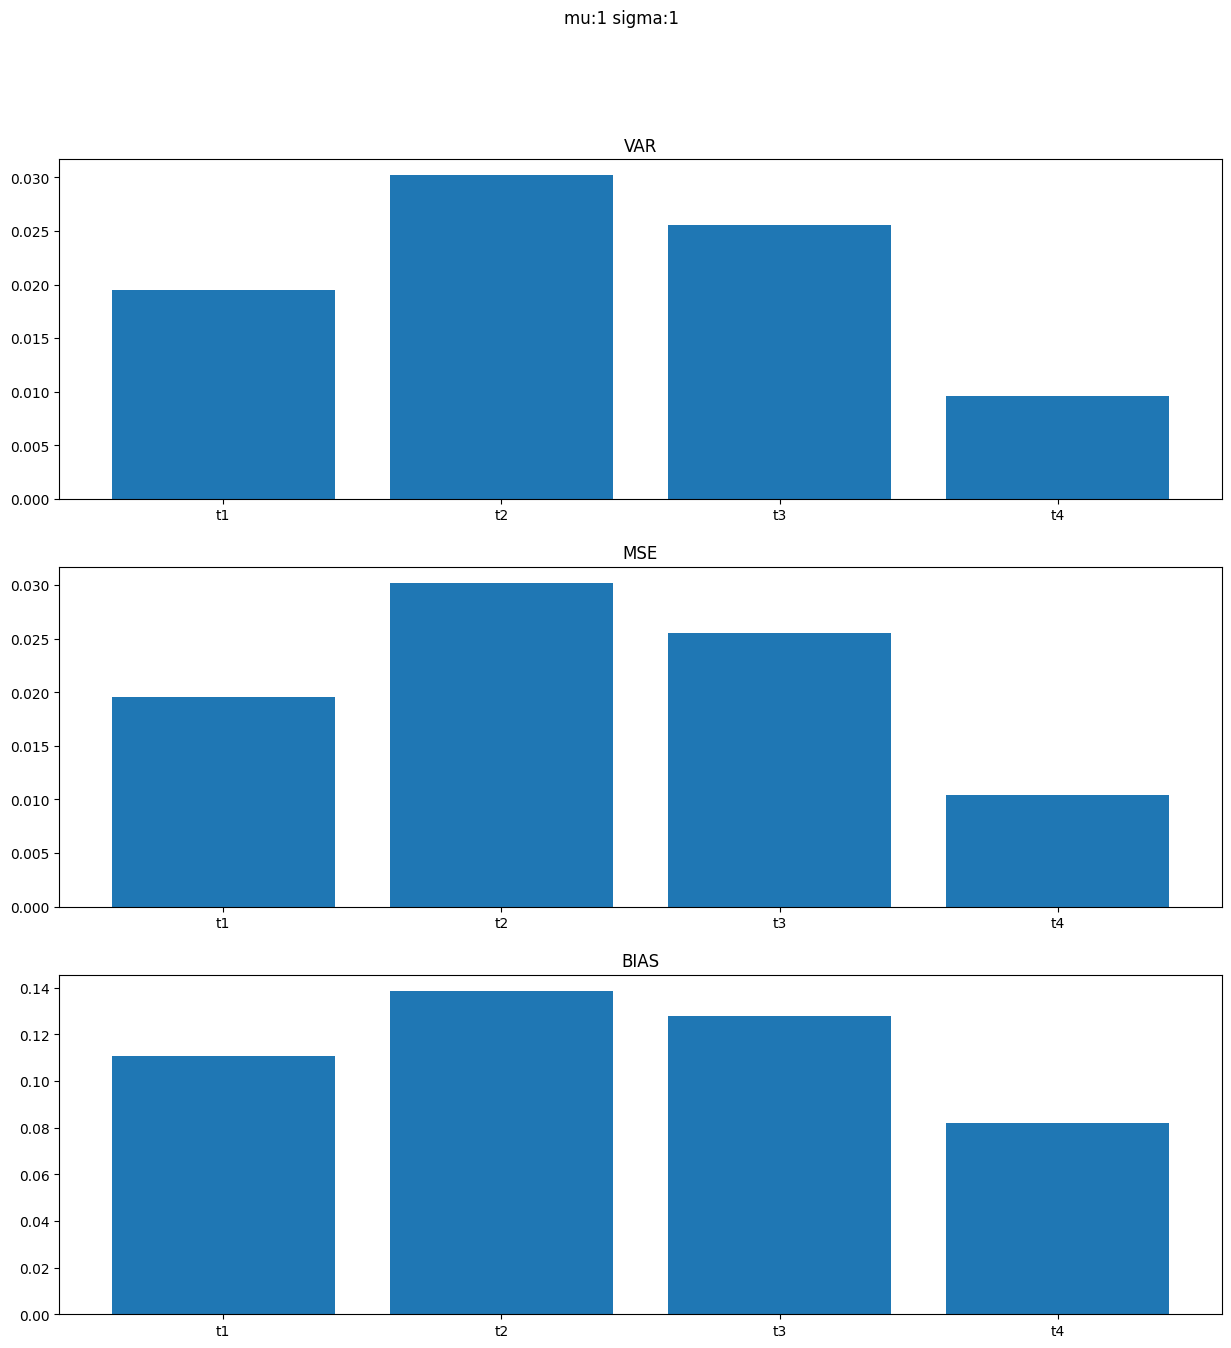

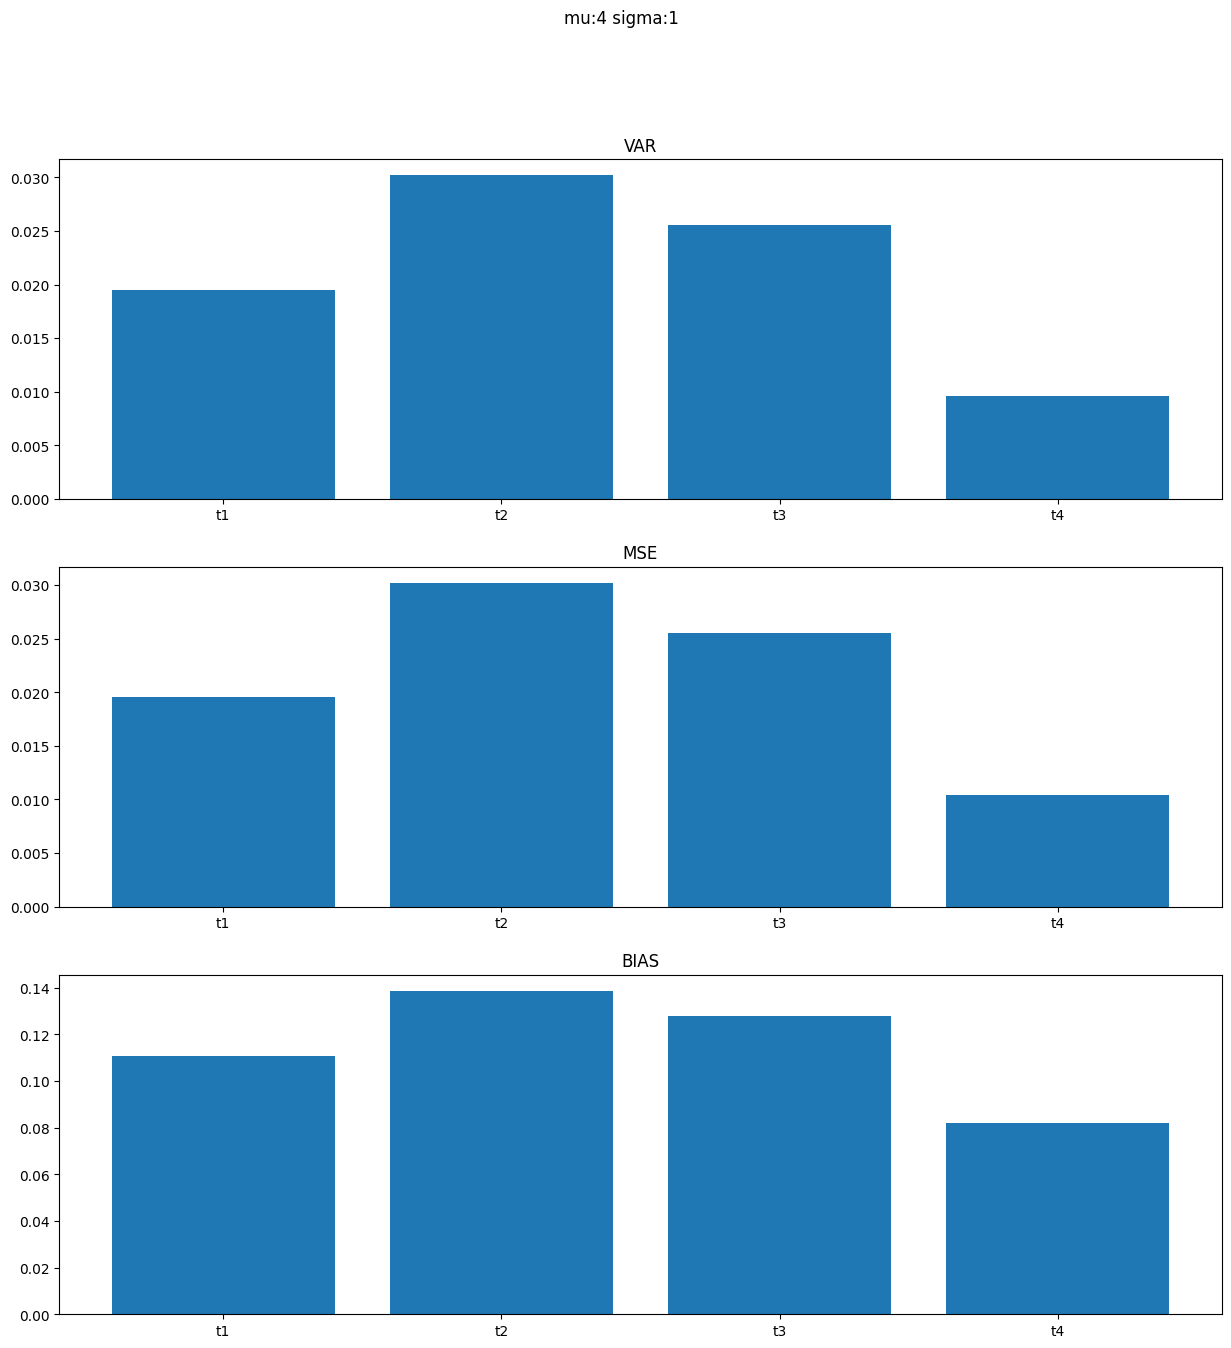

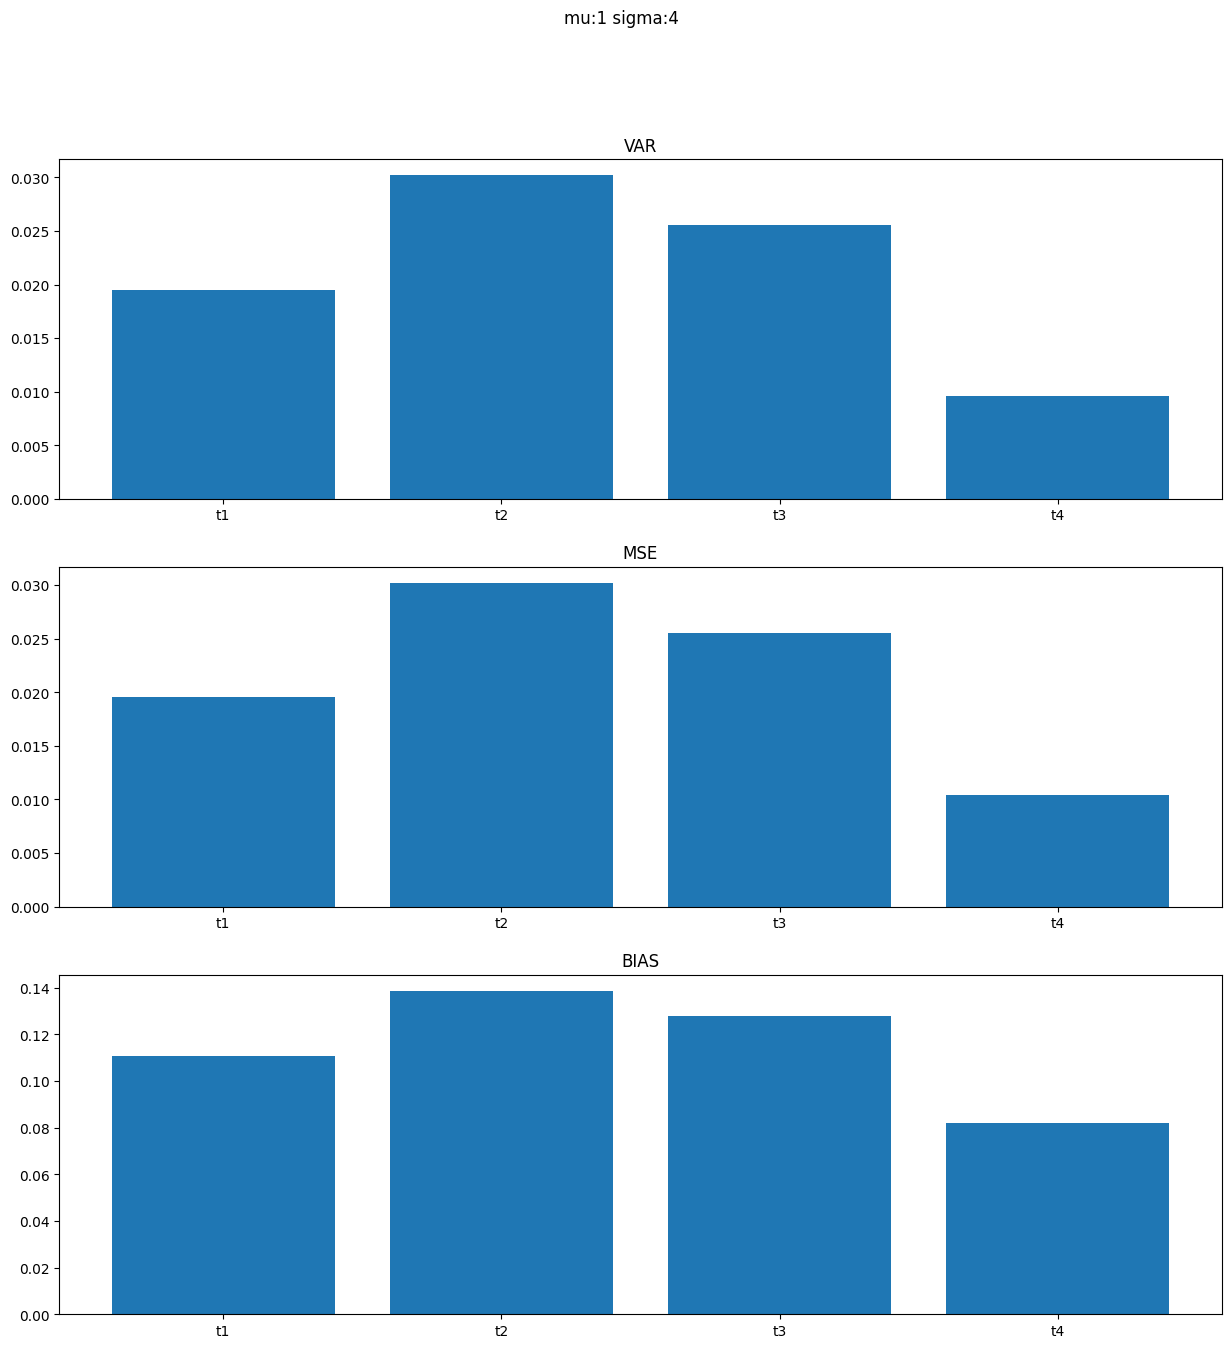

In [90]:
for mu, sigma in [(1,1), (4,1), (1,4)]:
    fig, axs = plt.subplots(3)
    fig.suptitle(f'mu:{mu} sigma:{sigma}')
    fig.set_figheight(15)
    fig.set_figwidth(15)
    axs[0].bar(estimators, summary[0,:,0])
    axs[0].set_title('VAR')
    axs[1].bar(estimators, summary[0,:,1])
    axs[1].set_title('MSE')
    axs[2].bar(estimators, summary[0,:,2])
    axs[2].set_title('BIAS')

## EX2

It's useful to set seed before running experiments which are using semi-random generators. When we want to reproduce our results by achiving same random generated samples we can do this by defining same seed for this experiment

## EX3

Sometimes we can't calculate solution of optimal likelihood estimator. Even if we can prove that solution exists it might be impossible or very hard to find the exact form of the solution. If this happens we can use numerical methods to find global maximum of likelihood function, this is the case when estimating the shifted parameter in the logistic distribution. 

## EX4

They have used Newton's method. At the beginning we have initial guess of desired function root, x_1. Then we get closer to the root, taking as a guess point which is in interception of tangent line and function's cr